In [2]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [4]:
df = pd.read_csv('../../../data/handlebar/Accelerometer_data_combined_segmented_overlap_50.csv') 
#df.drop('Unnamed: 0', axis=1, inplace=True)
df


,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,2024-07-24 10:26:01.863,2024-07-24 10:26:02.355,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,2024-07-24 10:26:02.111,2024-07-24 10:26:02.602,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0.0,2024-07-24 10:26:02.359,2024-07-24 10:26:02.851,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0.0,2024-07-24 10:26:02.608,2024-07-24 10:26:03.099,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0.0,2024-07-24 10:26:02.856,2024-07-24 10:26:03.348,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,1.0,2024-07-24 11:09:18.500,2024-07-24 11:09:36.279,22.821533,31.301788,37.301666,23.319519,10.673355,0.703888,2.973602,...,-36.889862,-28.251587,-2.475601,13.321335,25.191788,17.841599,11.908752,6.861786,7.015015,19.910187
3726,1.0,2024-07-24 11:09:18.743,2024-07-24 11:09:36.522,17.367538,12.004532,4.280838,0.167587,13.508087,13.508087,13.177689,...,7.910446,18.181564,18.684357,15.734695,5.645523,-3.869034,11.635818,33.605010,24.526200,8.207321
3727,1.0,2024-07-24 11:09:36.284,2024-07-24 11:09:53.759,17.769760,17.530350,17.530350,7.173035,4.118027,8.734055,1.345535,...,19.019547,19.871872,6.004654,9.461884,15.811310,22.572540,20.719421,20.719421,7.910446,0.928955
3728,1.0,2024-07-24 11:09:36.529,2024-07-24 11:10:11.046,-2.671936,20.561401,20.561401,15.883133,15.883133,11.774689,13.302185,...,2.834732,0.210693,2.078171,0.804459,0.804459,11.267120,10.807434,8.063675,4.228165,4.505890


In [5]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)


In [6]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 3:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 3:])
test_data_scaled = scaler.transform(test_data.iloc[:, 3:])



In [7]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[3:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[3:])
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
train_data_scaled_df.head()

,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene
0,-0.043399,-0.036445,-0.039909,-0.060094,-0.050310,-0.047696,-0.075391,-0.089531,-0.090752,-0.076505,...,-0.043150,-0.071323,-0.096998,-0.097019,-0.058825,-0.062461,-0.066930,-0.065874,-0.066939,0.0
1,1.732833,0.861269,-0.066900,-1.345973,-0.894126,0.209820,0.934705,0.829993,-0.302878,-0.544242,...,0.655119,-0.304608,-0.794407,-1.651467,-1.752088,-0.370351,-0.366041,1.040036,1.820544,1.0
2,1.108598,-0.307952,-1.216212,-1.146256,0.185394,1.187373,0.592034,-1.013123,-0.958307,0.582645,...,-0.685252,-0.784423,0.974519,1.458073,0.009070,-1.326325,-0.443189,0.728941,1.383342,0.0
3,-0.553325,-0.653575,-1.007376,-1.028728,-0.073208,0.570197,0.683861,0.283433,-0.743554,0.084684,...,0.607887,-0.015207,-0.946822,-0.043461,-0.298542,-0.262453,-0.822154,-0.065264,0.862935,0.0
4,0.970780,1.017063,0.127729,-0.398848,-0.465148,-0.729610,-1.568511,-1.432877,-0.073019,0.897828,...,-0.536533,0.011905,-0.465826,-0.511925,-0.461355,-0.283758,-0.314610,0.056735,-0.128249,0.0


In [8]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]

In [9]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

In [10]:
from keras.models import Sequential
from keras.layers import Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model

# Define the autoencoder model using Sequential API
model = Sequential([
    # Encoder layers
    Input(shape=(100,)),  # Input shape based on your data
    Dense(256, activation='tanh'),
    Dense(224, activation='tanh'),
    Dense(160, activation='tanh'),
    
    # Decoder layers
    Dense(160, activation='tanh'),
    Dense(224, activation='tanh'),
    Dense(256, activation='tanh'),
    Dense(100, activation='tanh')  # Output shape matches input shape
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mae')

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 224)            │        57,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 160)            │        36,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 160)            │        25,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 224)            │        36,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        57,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,548 (1.01 MB)

 Trainable params: 264,548 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
## Compile the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mae')

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 224)            │        57,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 160)            │        36,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 160)            │        25,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 224)            │        36,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        57,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,548 (1.01 MB)

 Trainable params: 264,548 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, 
                    normal_train_data_scaled,
                    epochs=200, 
                    batch_size=512,
                    validation_split=0.3, 
                    shuffle=True, 
                    callbacks=[early_stopping])

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.4629 - val_loss: 0.4549
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4490 - val_loss: 0.4371
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4316 - val_loss: 0.4212
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.4168 - val_loss: 0.4071
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4032 - val_loss: 0.3942
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3918 - val_loss: 0.3824
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3754 - val_loss: 0.3716
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3680 - val_loss: 0.3616
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3596 - val_loss: 0.3525
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3494 - val_loss: 0.3442
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3374 - val_loss: 0.3368
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3311 - val_lo

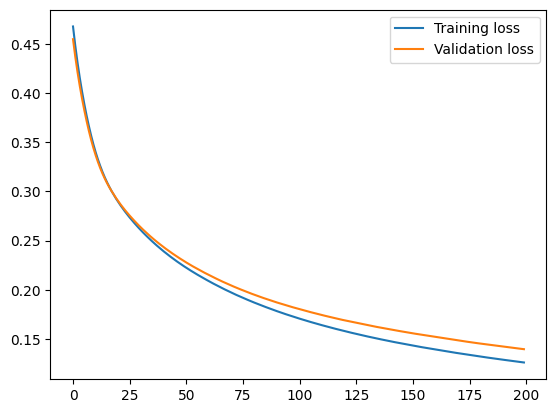

In [15]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [14]:
from keras import ops
model.save('../../../models/autoencoder_best.keras')

In [24]:
load_model = tf.keras.models.load_model('../../../models/autoencoder_best.keras')

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


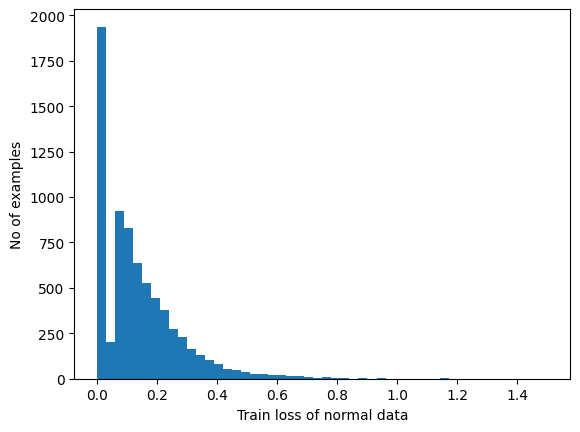

In [28]:
#Plot the reconstruction error on normal data from the training set
reconstructions_normal = load_model.predict(normal_train_data_scaled)
train_loss_normal = tf.keras.losses.mae(reconstructions_normal, normal_train_data_scaled)

plt.hist(train_loss_normal[None,:], bins=50)
plt.xlabel("Train loss of normal data")
plt.ylabel("No of examples")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


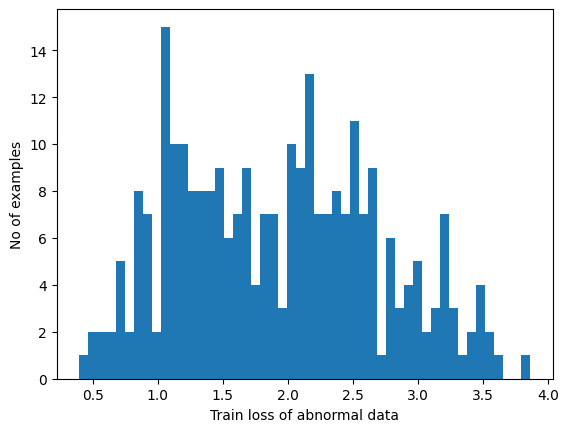

In [29]:
#Plot the reconstruction error on abnormal data from the training set
reconstructions_abnormal = load_model.predict(abnormal_train_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstructions_abnormal, abnormal_train_data_scaled)

plt.hist(train_loss_abnormal[None,:], bins=50)
plt.xlabel("Train loss of abnormal data")
plt.ylabel("No of examples")
plt.show()

In [ ]:
# Calculate threshold based on normal data statistics
# Common approach: mean + n*std of normal reconstruction errors
mean = np.mean(train_loss_normal)
std = np.std(train_loss_normal)
threshold = mean + 2 * std  

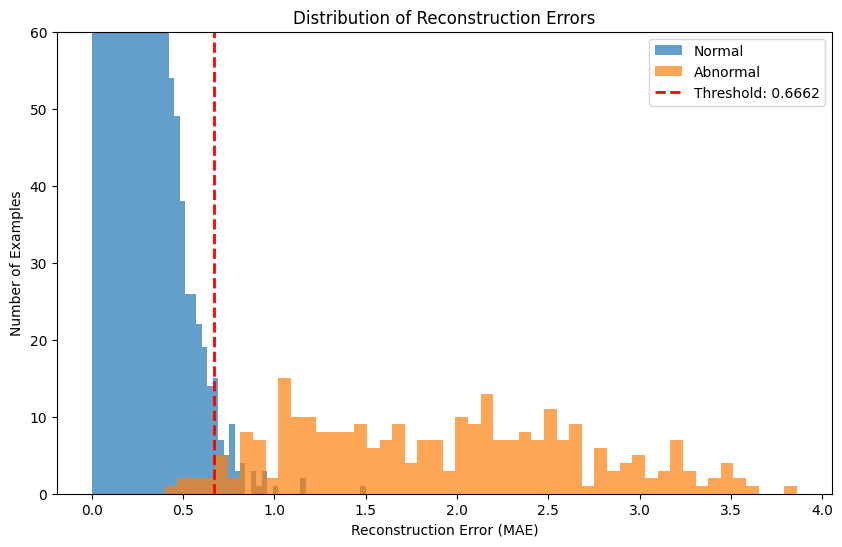

In [40]:
# Visualize threshold with histogram
plt.figure(figsize=(10, 6))
plt.hist(train_loss_normal, bins=50, alpha=0.7, label='Normal')
plt.hist(train_loss_abnormal, bins=50, alpha=0.7, label='Abnormal')
plt.ylim(0, 60)
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2, label=f'Threshold: {threshold:.4f}')
plt.xlabel('Reconstruction Error (MAE)')
plt.ylabel('Number of Examples')
plt.title('Distribution of Reconstruction Errors')
plt.legend()
plt.show()

In [ ]:
#Find best threshold using ROC and Precision-Recall curves
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import numpy as np

# Prepare labels for evaluation
normal_labels = np.zeros(len(train_loss_normal))
abnormal_labels = np.ones(len(train_loss_abnormal))

# Combine reconstruction errors and labels
all_reconstruction_errors = np.concatenate([train_loss_normal, train_loss_abnormal])
all_labels = np.concatenate([normal_labels, abnormal_labels])

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(all_labels, all_reconstruction_errors)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(all_labels, all_reconstruction_errors)
pr_auc = auc(recall, precision)

# Find optimal threshold using Youden's J statistic
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds_roc[optimal_idx]

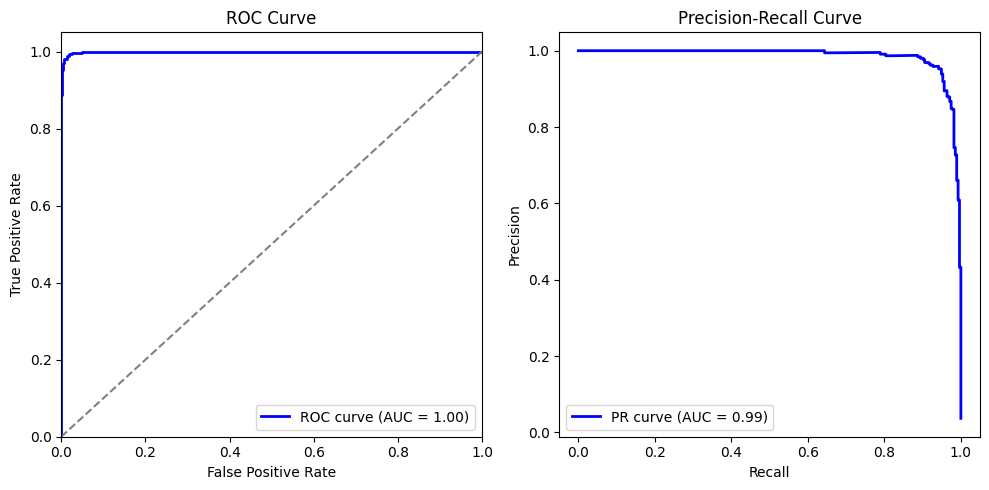

In [ ]:
# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
# Print results
print(f"Optimal threshold: {optimal_threshold:.4f}")

# Evaluate performance with optimal threshold
y_pred = (all_reconstruction_errors > optimal_threshold).astype(int)
tn = np.sum((all_labels == 0) & (y_pred == 0))
fp = np.sum((all_labels == 0) & (y_pred == 1))
fn = np.sum((all_labels == 1) & (y_pred == 0))
tp = np.sum((all_labels == 1) & (y_pred == 1))

accuracy = (tp + tn) / len(all_labels)
precision_score = tp / (tp + fp)
recall_score = tp / (tp + fn)
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)

print("\nPerformance metrics with optimal threshold:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision_score:.4f}")
print(f"Recall: {recall_score:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Optimal threshold: 0.6662

Performance metrics with optimal threshold:
Accuracy: 0.9926
Precision: 0.8459
Recall: 0.9782
F1-Score: 0.9073


In [42]:
# Save threshold
np.save('../../../models/autoencoder_threshold.npy', optimal_threshold)
print(f"Threshold {optimal_threshold:.4f} saved successfully")

Threshold 0.6662 saved successfully
